In [1]:
!nvidia-smi

Tue Dec  5 16:50:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#Set the directory
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
#Install YOLOv8
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/78.2 GB disk)


In [4]:
#Import YOLO for training..

from ultralytics import YOLO
from IPython.display import display, Image

In [5]:
# Download the custom labelled TACO dataset which transformed from Roboflow <the created workspace>
# Below is the pre-processing and augmentation parameters applied on the dataset.
# By downloading from the self generated workspace and api key Roboflow will provide
# download link for the dataset which will download the dataset directly to the training environment.
'''
Total Images: 3597
Dataset Split
			Train set:3147  [87%]
            Test set:151    [4%]
            Validate set:299[8%]

Preprocessing
			Auto-Orient: Applied
			Resize: Stretch to 640x640


Augmentations
			Outputs per training example: 3
			Flip: Horizontal, Vertical
			90° Rotate: Clockwise, Counter-Clockwise, Upside Down
			Crop: 0% Minimum Zoom, 15% Maximum Zoom
			Rotation: Between -8° and +8°
			Shear: ±3° Horizontal, ±3° Vertical
			Grayscale: Apply to 5% of images
			Hue: Between -15° and +15°
			Saturation: Between -20% and +20%
			Brightness: Between -20% and +20%
			Exposure: Between -10% and +10%
			Blur: Up to 0.75px
			Cutout: 5 boxes with 2% size each
'''
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

# api-key generated from roboflow workspace to download the TACO dataset in YoloV8 format.
from roboflow import Roboflow
rf = Roboflow(api_key="fR5rAAgUtxpvu1aEzWsQ")
project = rf.workspace("roboflow-universe-projects").project("taco-object-detection-kcxyn")
dataset = project.version(2).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not i


Extracting Dataset Version Zip to TACO:-Object-Detection-2 in yolov8:: 100%|██████████| 7206/7206 [00:01<00:00, 4790.28it/s]


In [6]:
#View the data yaml for no of classes and train test dataset filepaths 
%cat {dataset.location}/data.yaml

names:
- Aerosol
- Aluminium blister pack
- Aluminium foil
- Battery
- Broken glass
- Carded blister pack
- Cigarette
- Clear plastic bottle
- Corrugated carton
- Crisp packet
- Disposable food container
- Disposable plastic cup
- Drink can
- Drink carton
- Egg carton
- Foam cup
- Foam food container
- Food Can
- Food waste
- Garbage bag
- Glass bottle
- Glass cup
- Glass jar
- Magazine paper
- Meal carton
- Metal bottle cap
- Metal lid
- Normal paper
- Other carton
- Other plastic bottle
- Other plastic container
- Other plastic cup
- Other plastic wrapper
- Other plastic
- Paper bag
- Paper cup
- Paper straw
- Pizza box
- Plastic bottle cap
- Plastic film
- Plastic glooves
- Plastic lid
- Plastic straw
- Plastic utensils
- Polypropylene bag
- Pop tab
- Rope - strings
- Scrap metal
- Shoe
- Single-use carrier bag
- Six pack rings
- Spread tub
- Squeezable tube
- Styrofoam piece
- Tissues
- Toilet tube
- Tupperware
- Unlabeled litter
- Wrapping paper
nc: 59
roboflow:
  license: CC BY 4

In [7]:
# Custom Training starts with the downloaded dataset.
# Remember to set 'imgsz' param to 640 as the tensor size so that while inference from node js
# the same tensor size will be used to classify.
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=30 imgsz=640 plots=True

/content
100% 49.7M/49.7M [00:00<00:00, 433MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/datasets/TACO:-Object-Detection-2/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript

In [8]:
#Listh files generated in the runs/detect folder
!ls {HOME}/runs/detect/train/

args.yaml					    results.png		   val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg	   val_batch1_labels.jpg
events.out.tfevents.1701795220.63347f80cdc0.1835.0  train_batch1.jpg	   val_batch1_pred.jpg
F1_curve.png					    train_batch2.jpg	   val_batch2_labels.jpg
P_curve.png					    train_batch3940.jpg    val_batch2_pred.jpg
PR_curve.png					    train_batch3941.jpg    weights
R_curve.png					    train_batch3942.jpg
results.csv					    val_batch0_labels.jpg


/content


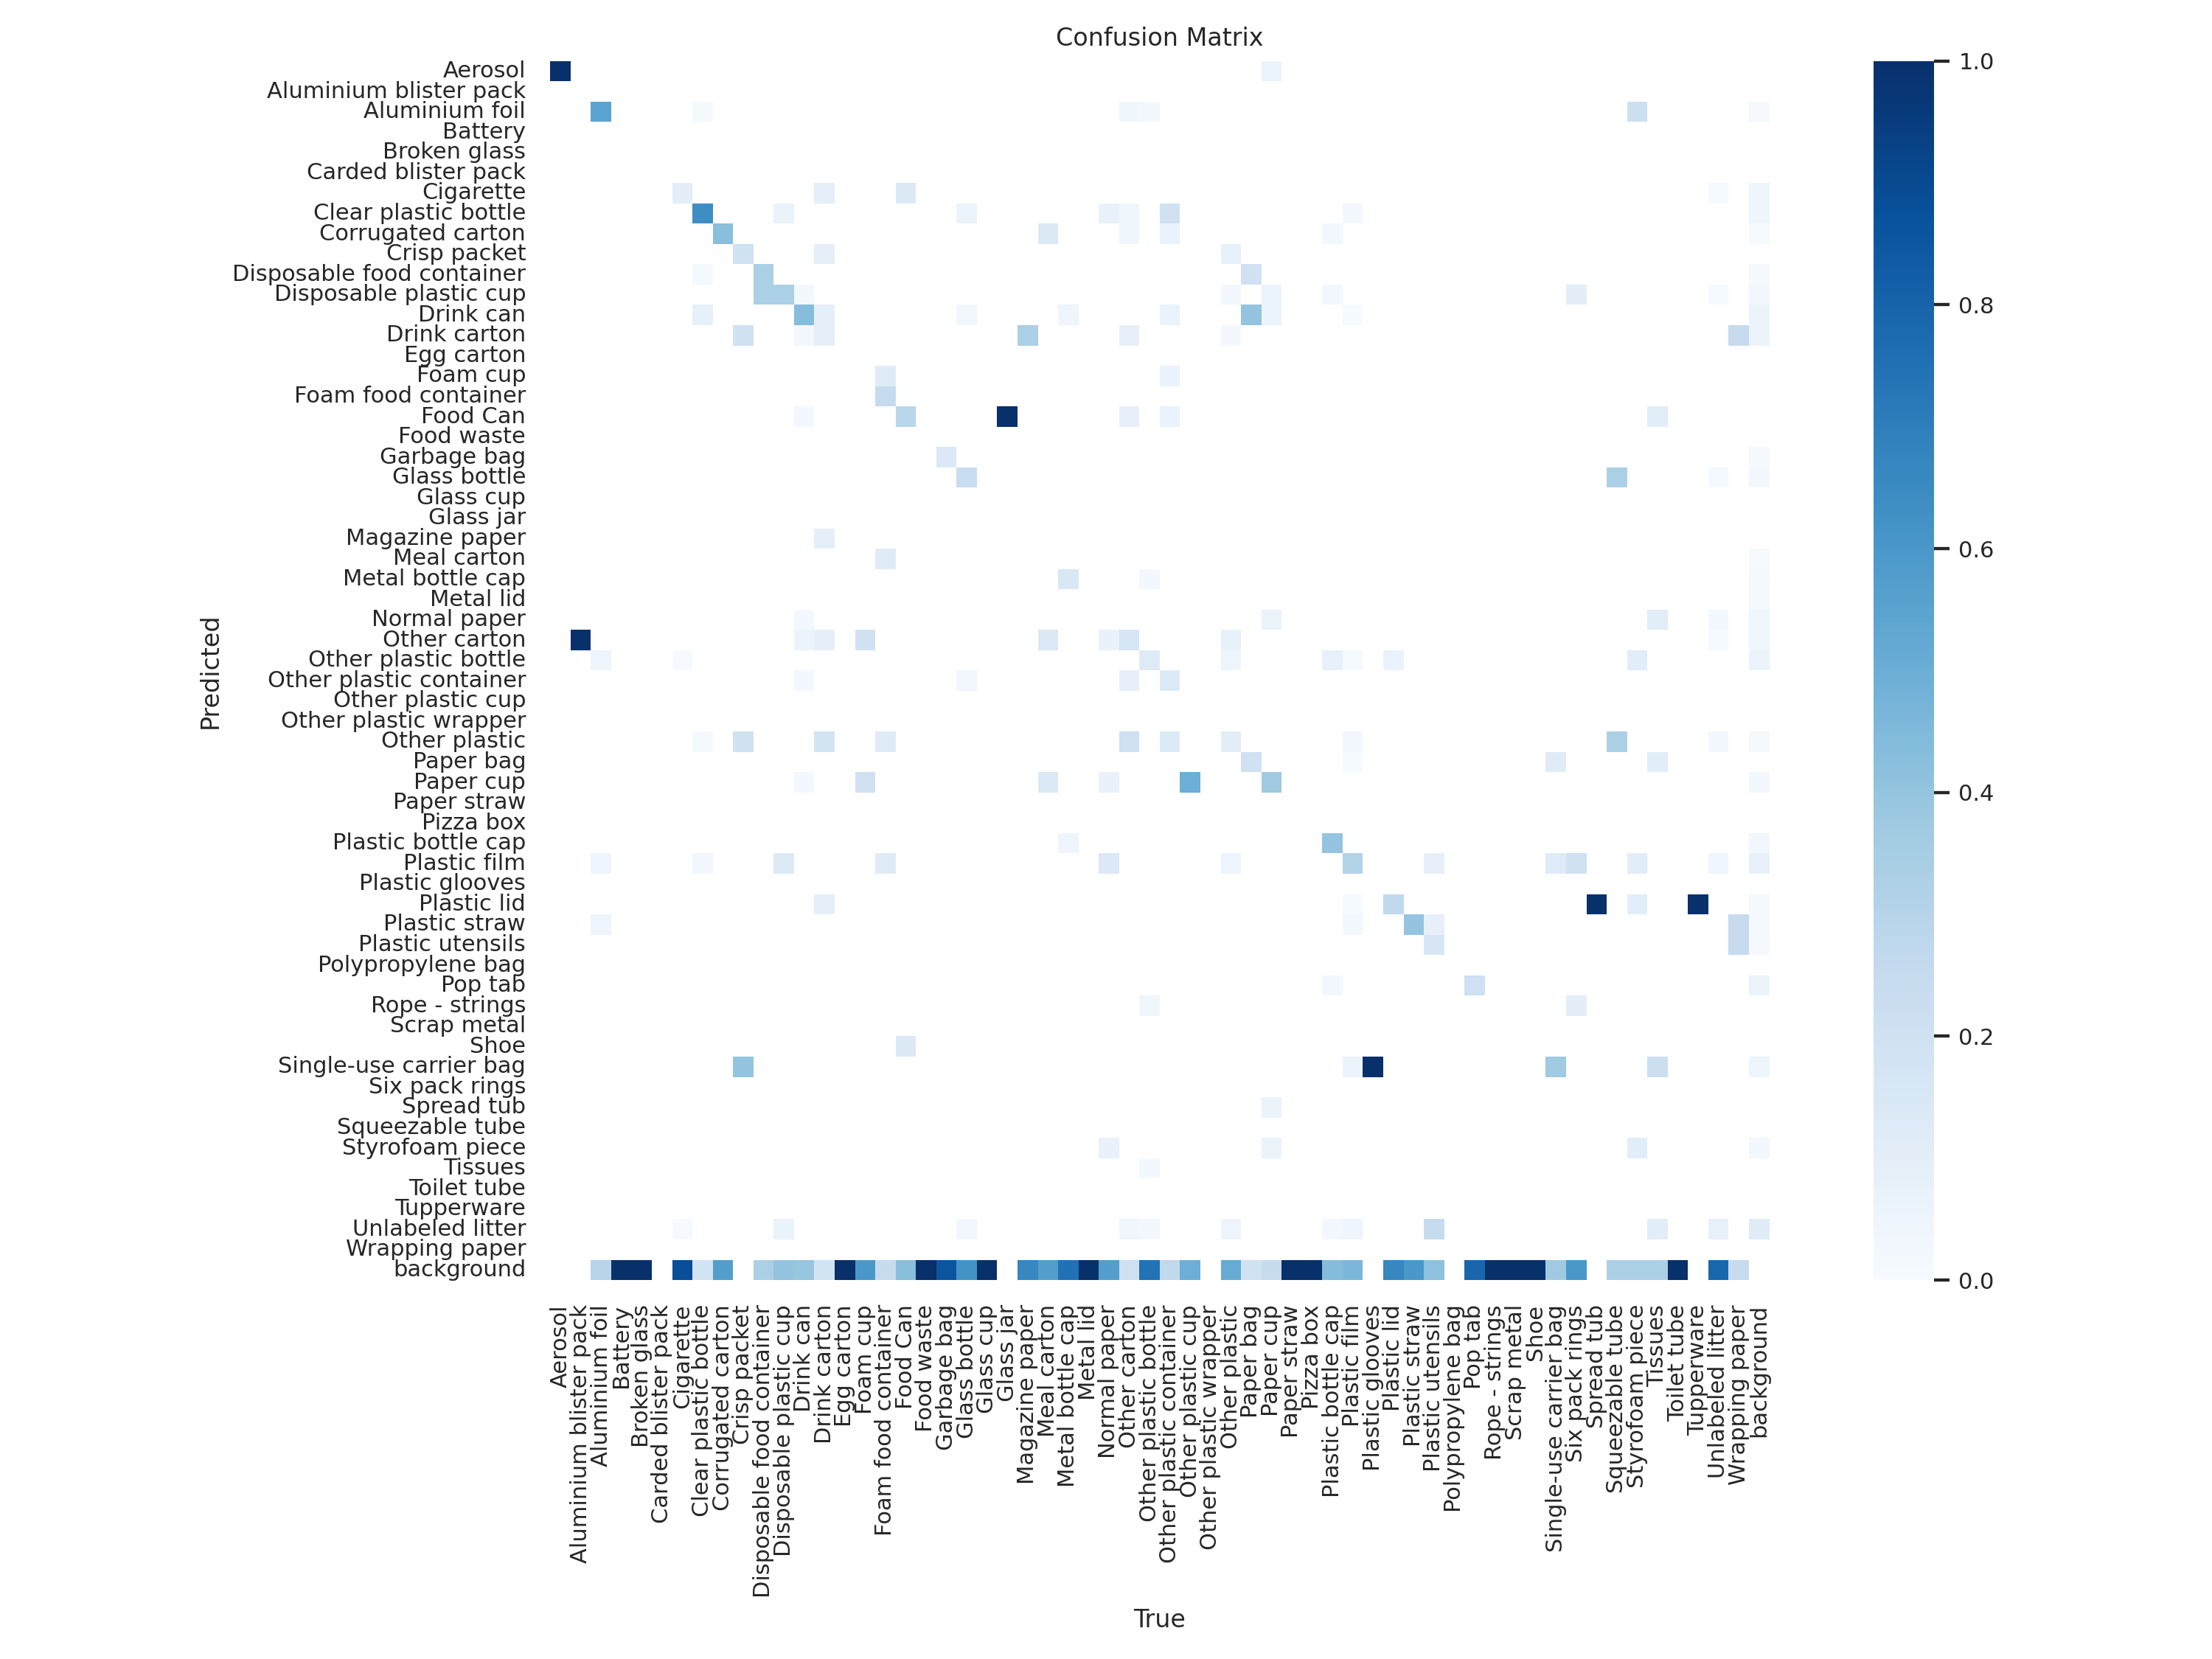

In [9]:
#View the confusion matrix
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


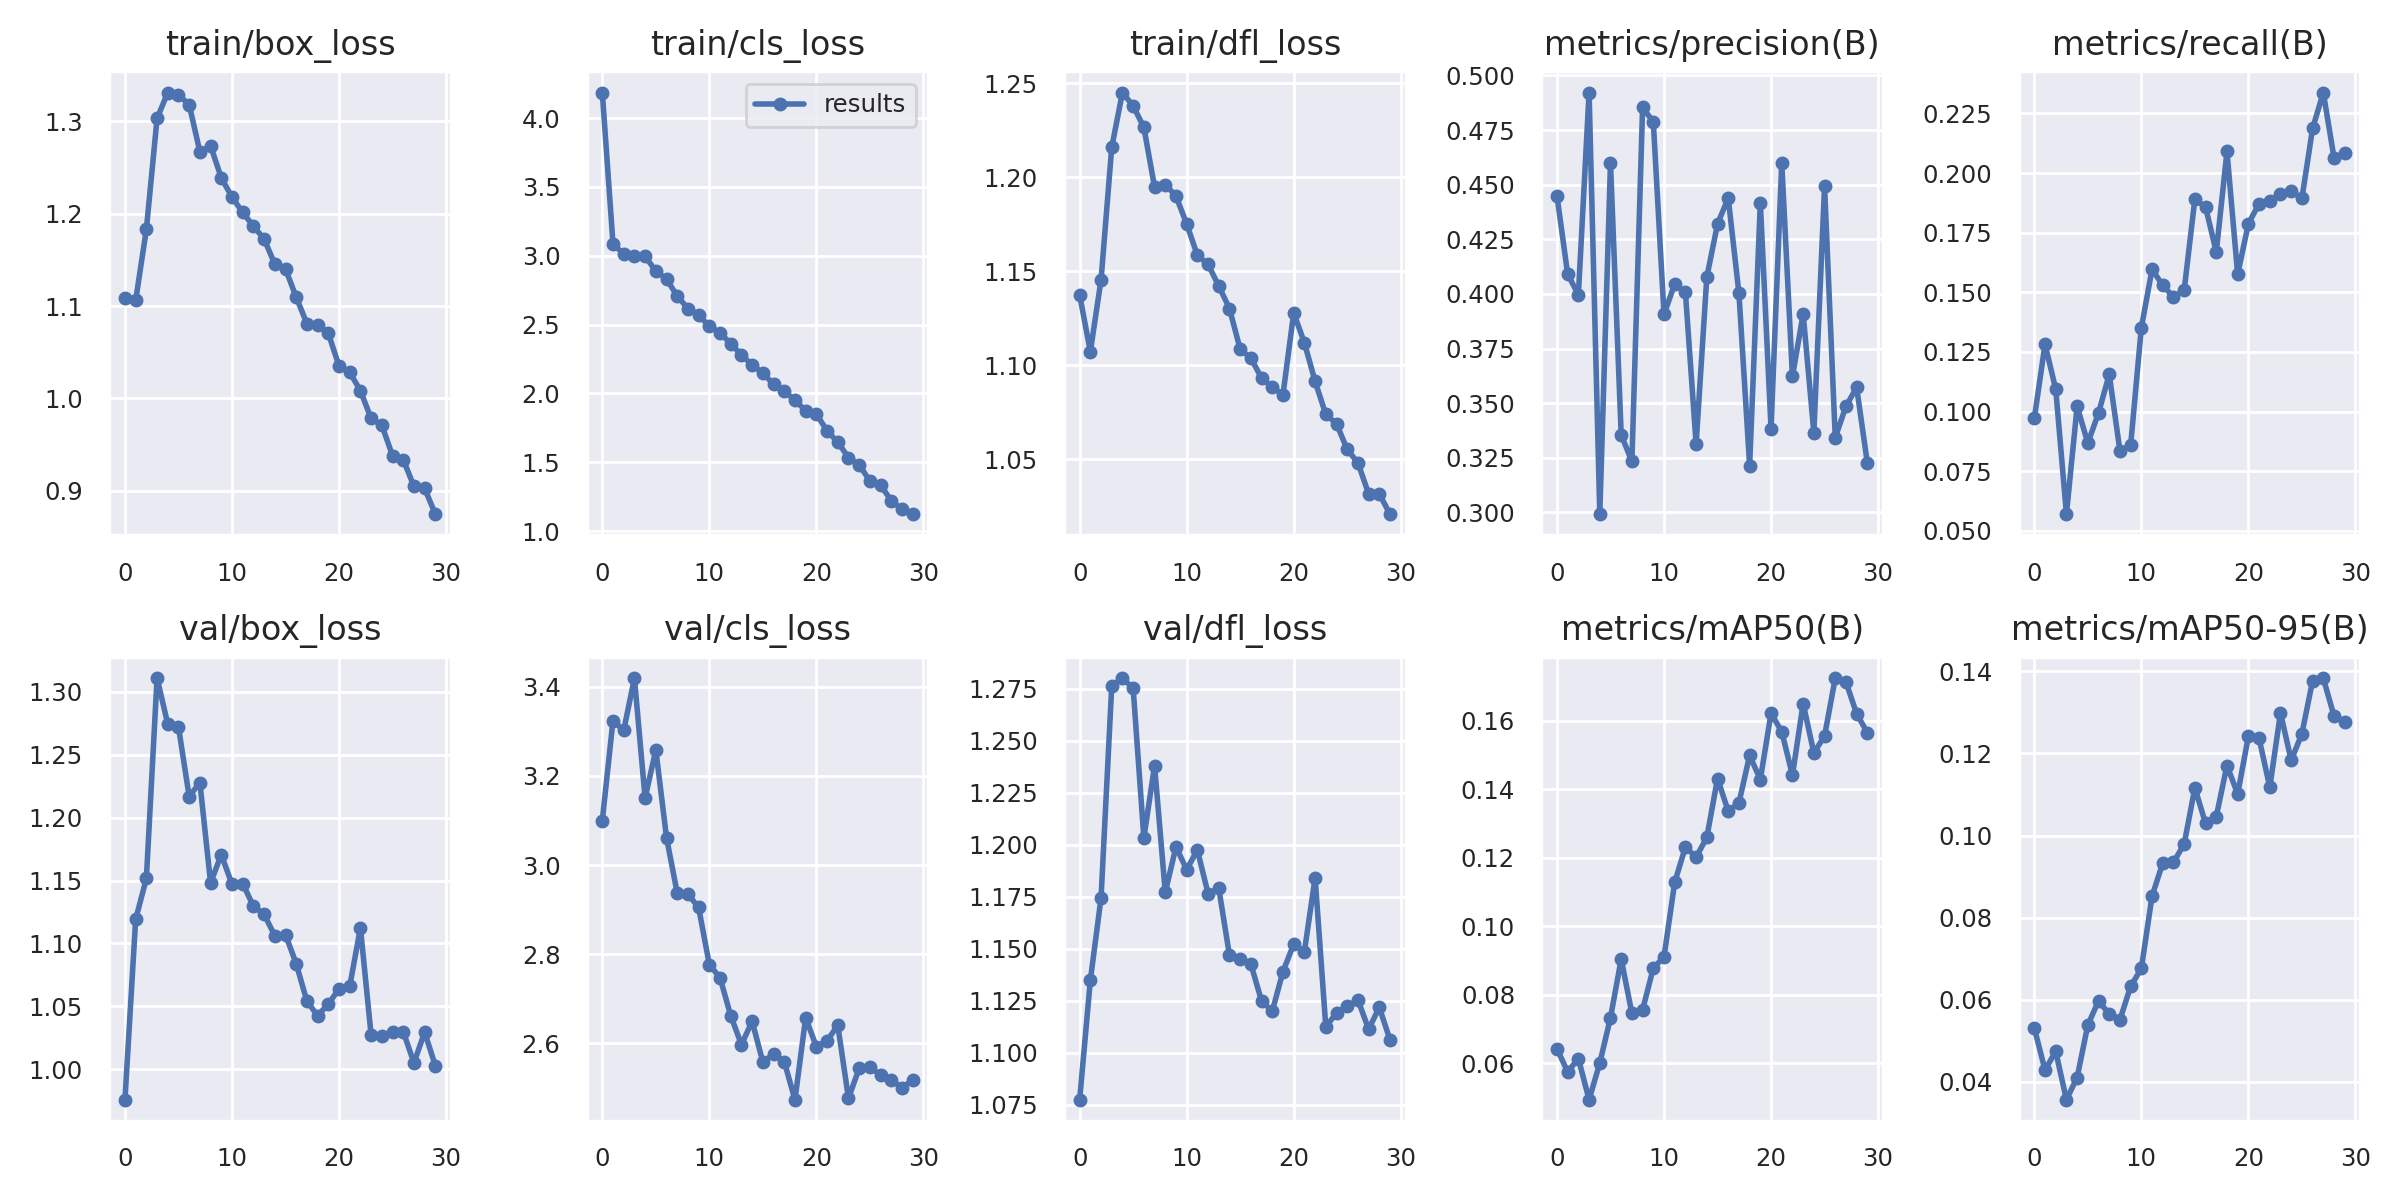

In [10]:
#View the training results
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


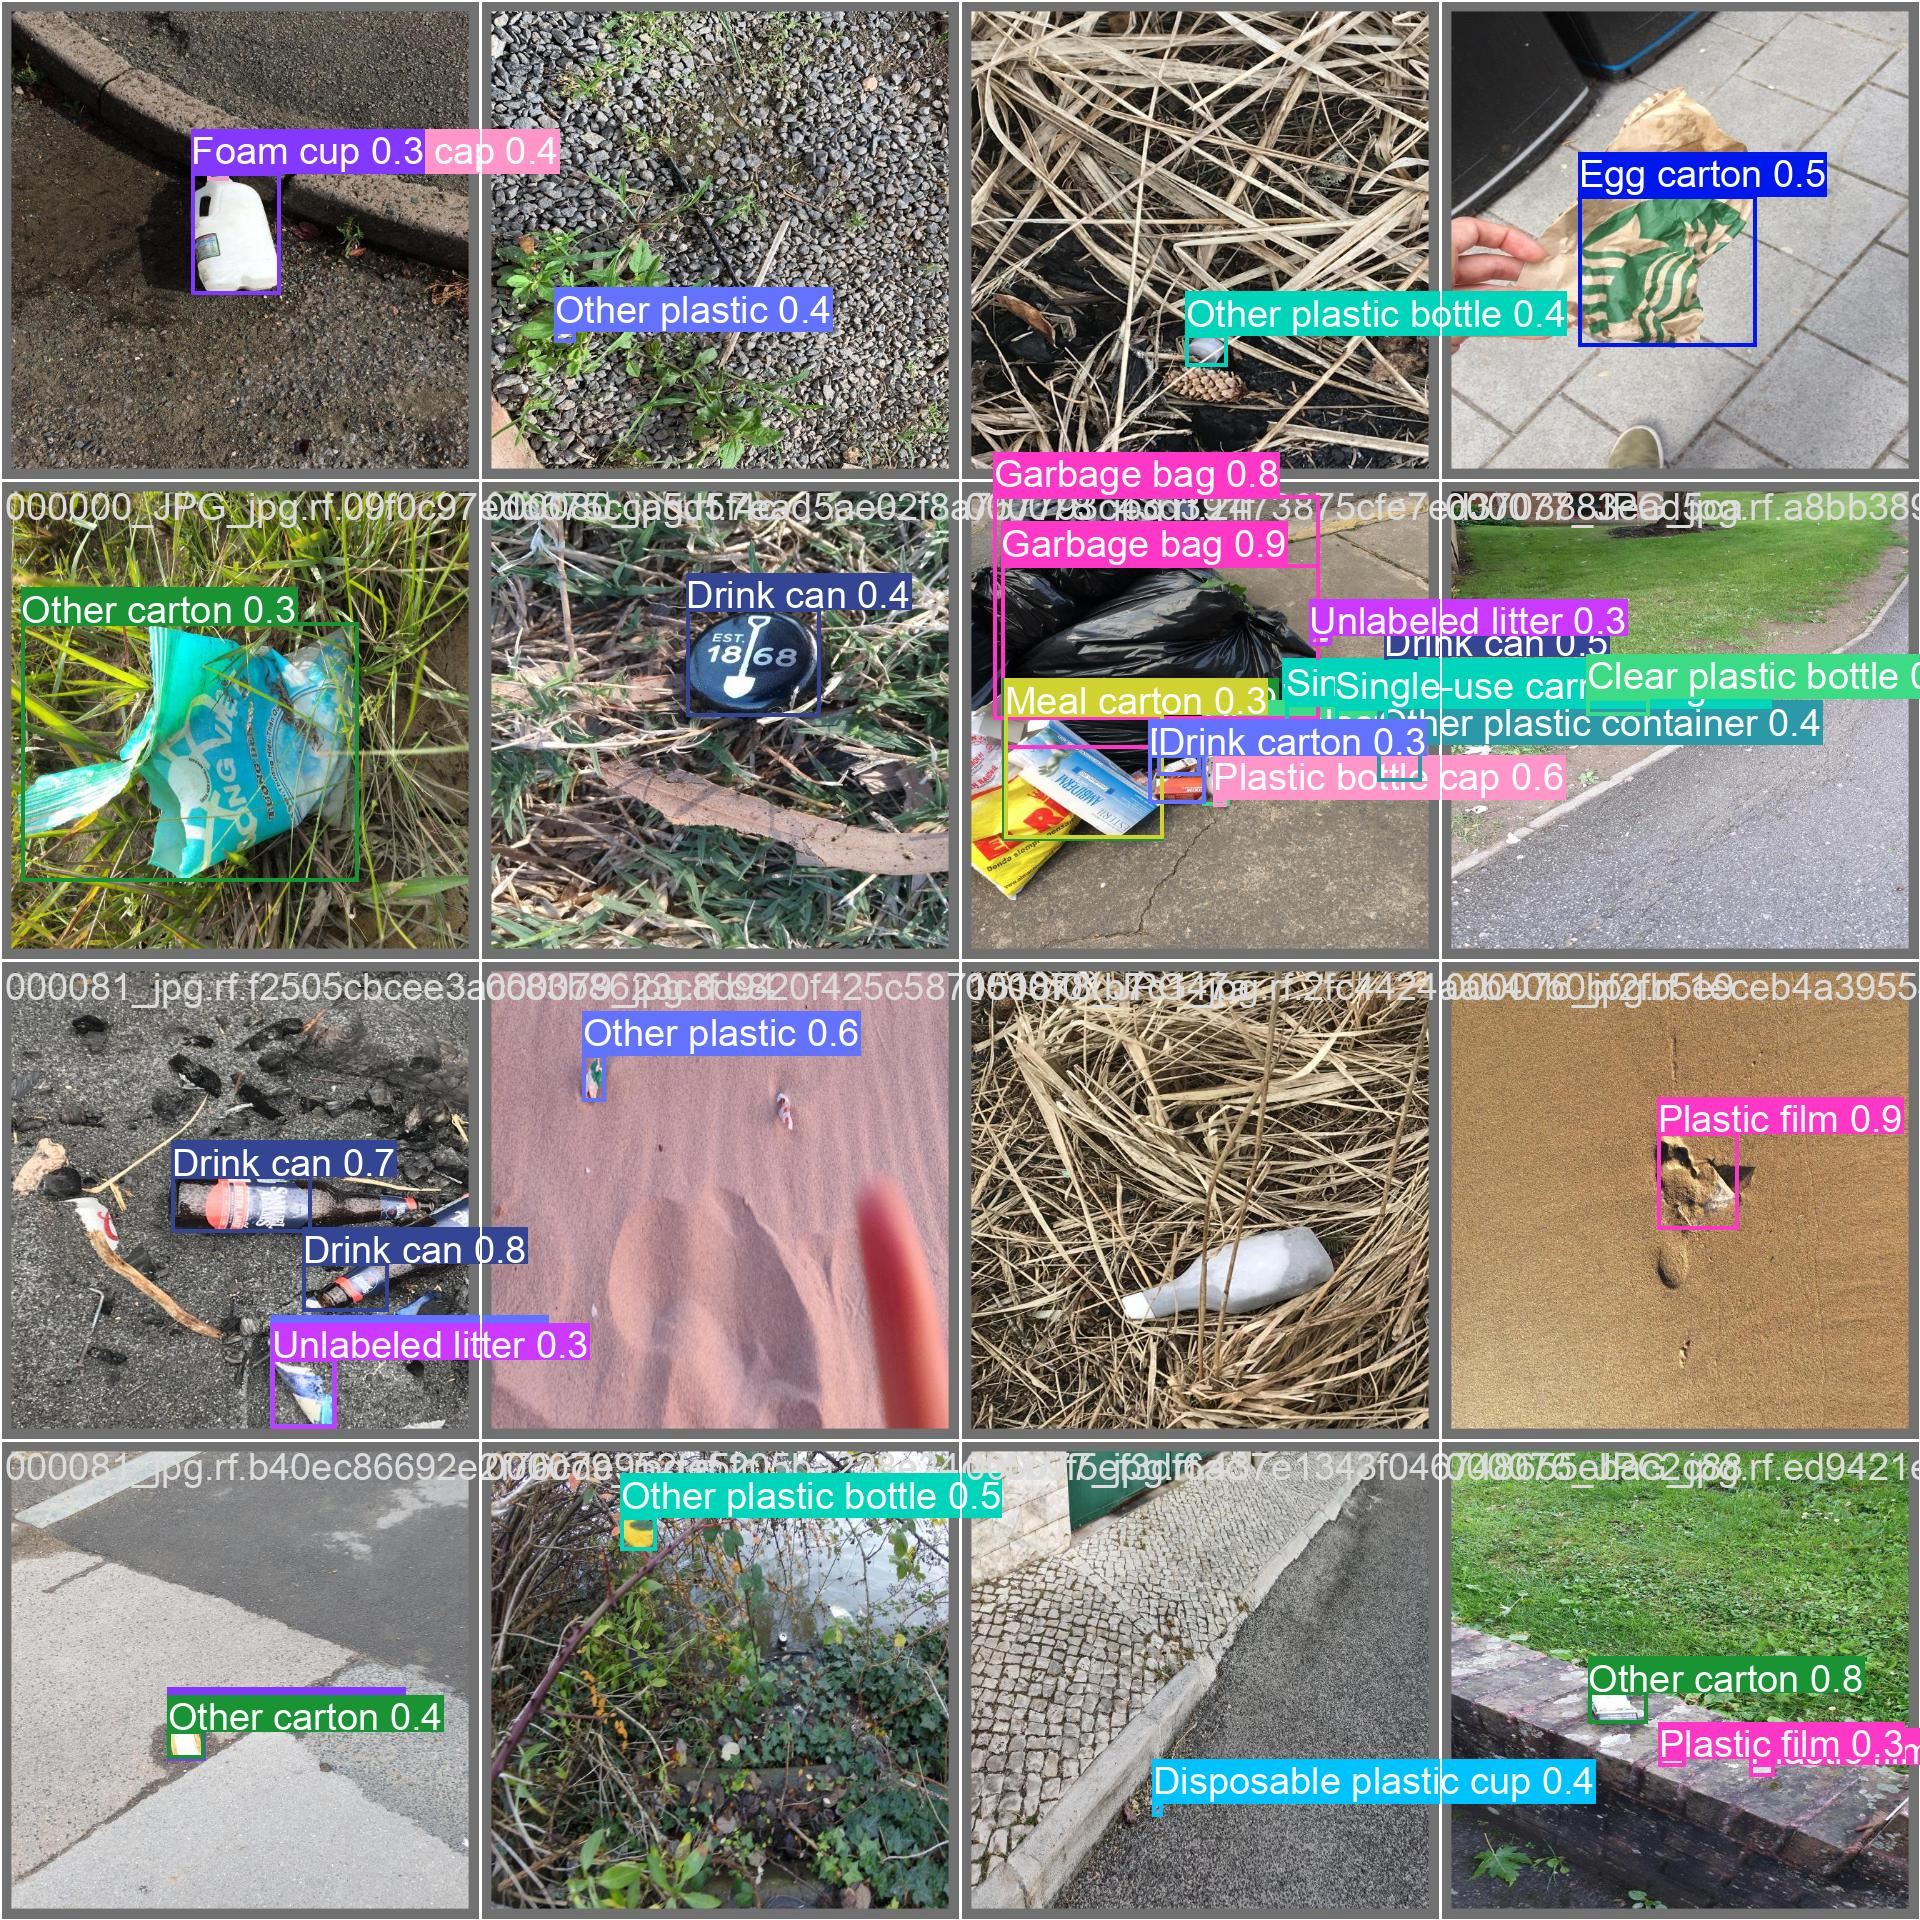

In [11]:
#Check the Validate image from the detect
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [12]:
## Validate the Custom Model:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-12-05 18:27:40.815106: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-05 18:27:40.815168: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-05 18:27:40.815207: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-05 18:27:41.849544: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25873921 parameters, 0 gradients, 78.9 GFLOPs
val: Scanning /content/datasets/TACO:-Object-Detection-2/vali

In [13]:
## Inference with Custom Model -- Then the results will be saved into runs/detect/predict

%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-12-05 18:28:17.463976: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-05 18:28:17.464034: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-05 18:28:17.464075: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-05 18:28:18.991906: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25873921 parameters, 0 gradients, 78.9 GFLOPs
image 1/151 /content/datasets/TACO:-Object-Detection-2/test/i

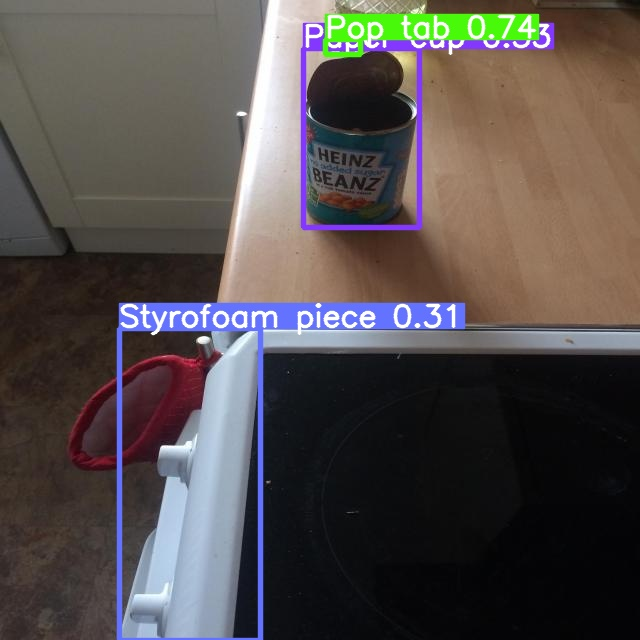

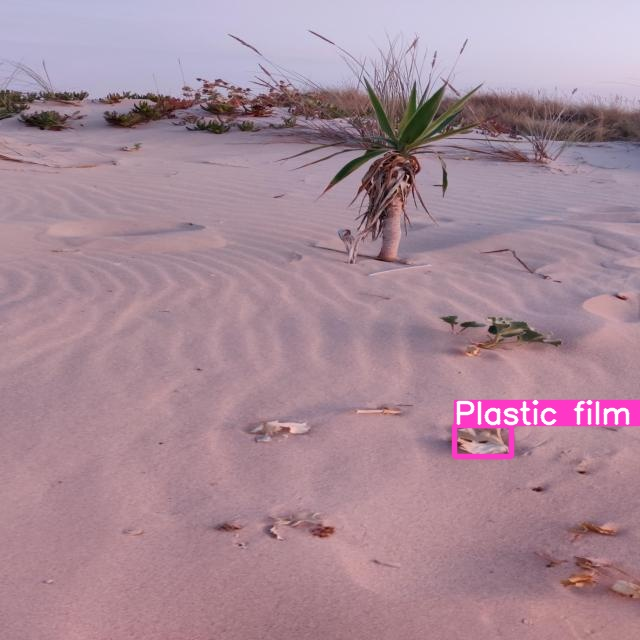

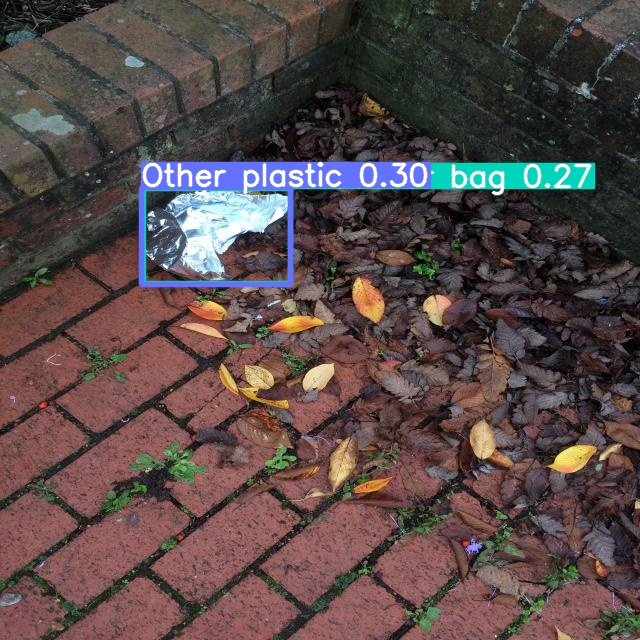

In [14]:
## Now  Let's take a look at few results.

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [15]:
%pwd
%ls

datasets/  runs/  yolov8m.pt


In [16]:
## Export the model to ONNX format so that backend node js can do the inference.

from ultralytics import YOLO

# Load the best model
model = YOLO('runs/detect/train/weights/best.pt')  # load a custom trained model

# Export the model
model.export(format='onnx')

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25873921 parameters, 0 gradients, 78.9 GFLOPs

PyTorch: starting from runs/detect/train/weights/best.pt with output shape (1, 63, 8400) (49.7 MB)
requirements: YOLOv8 requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 71.5 MB/s eta 0:00:00

requirements: 1 package updated per ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0...
ONNX: export success ✅ 11.2s, saved as runs/detect/train/weights/best.onnx (98.9 MB)

Export complete (24.5s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo task=detect mode=predict model=runs/detect/train/weights/best.onnx -WARNING ⚠️ not yet supported for YOLOv8 exported models
Validate:        yolo task=detect mode=val model=runs/detect/train/weights/best.onnx